## Setup

In [53]:
import numpy as np
import pandas as pd
import plotnine as pn

from collections import Counter

from sciterra.mapping.atlas import Atlas

In [54]:
# bibtex_fp = "hafenLowredshiftLymanLimit2017.bib"
# atlas_dir = "outputs/atlas_s2/"
# atlas_dir = "outputs/atlas_s2-7-19-23"
# atlas_dir = "outputs/atlas_s2-7-21-23_phil/"
# atlas_dir = "outputs/atlas_s2-7-20-23_uncentered_imeletal/"
# atlas_dir = "outputs/atlas_from_cc_region_8/"
atlas_dir = "outputs/atlas_s2-7-29-23_centered_imeletal"

In [55]:
atl = Atlas.load(atlas_dir)

In [56]:
len(atl)

10296

## Exploratory data analysis

In [57]:
# can we get information by year?
years = dict()
papers_per_year = dict()
words = Counter()

def get_binary_occurences(abstract: str):
    """Return a Counter that counts up to 1 for each word."""
    counter = Counter(abstract.split())
    for k in counter:
        counter[k] = 1
    return counter

for id in atl.publications:
    pub = atl[id]
    # there should be functionality to pass to atlas to 'filter if None' that removes all publications / embeddings that have certain attributes None
    if pub.publication_date is not None:
        year = pub.publication_date.year
        if year not in years:
            years[year] = Counter()
            papers_per_year[year] = 0
        years[year] += get_binary_occurences(pub.abstract)
        papers_per_year[year] += 1


In [58]:
papers_per_year

{2019: 212,
 2011: 443,
 2014: 402,
 2013: 401,
 2010: 396,
 2012: 454,
 2016: 328,
 2018: 287,
 2020: 204,
 2021: 173,
 2017: 248,
 2022: 130,
 2015: 307,
 2009: 398,
 2023: 52,
 2007: 405,
 2008: 367,
 2005: 320,
 1989: 124,
 2006: 351,
 2003: 298,
 1971: 11,
 1999: 232,
 2000: 269,
 1994: 217,
 1995: 239,
 1992: 203,
 1991: 172,
 1981: 24,
 1998: 218,
 1993: 248,
 1997: 205,
 2004: 288,
 1967: 9,
 1996: 248,
 1990: 167,
 2001: 273,
 2002: 314,
 1982: 35,
 1974: 14,
 1973: 8,
 1987: 80,
 1959: 4,
 1988: 100,
 1977: 23,
 1986: 76,
 1964: 6,
 1985: 56,
 1979: 23,
 1984: 40,
 1983: 34,
 1980: 15,
 1978: 12,
 1975: 17,
 1965: 7,
 1968: 13,
 1938: 1,
 1962: 5,
 1963: 4,
 1955: 4,
 1976: 19,
 1970: 12,
 1956: 2,
 1972: 13,
 1920: 1,
 1969: 5,
 1954: 1,
 1961: 2,
 1960: 2,
 1950: 6,
 1953: 1,
 1952: 2,
 1958: 5,
 1934: 1,
 1966: 4,
 1957: 1,
 1899: 1,
 1936: 1,
 1947: 1,
 1948: 1,
 1949: 1}

In [59]:
# divide the concept counts by the number of papers per year

for key in papers_per_year:
    counter = years[key]
    for word, freq in counter.items():
        counter[word] = freq / papers_per_year[key]


In [60]:
# now just remove years that don't have more than N papers?
years = {k:v for k,v in years.items() if papers_per_year[k] > 30}

Check not normalized

Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.
Confidence intervals are not yet implemented for lowess smoothings.


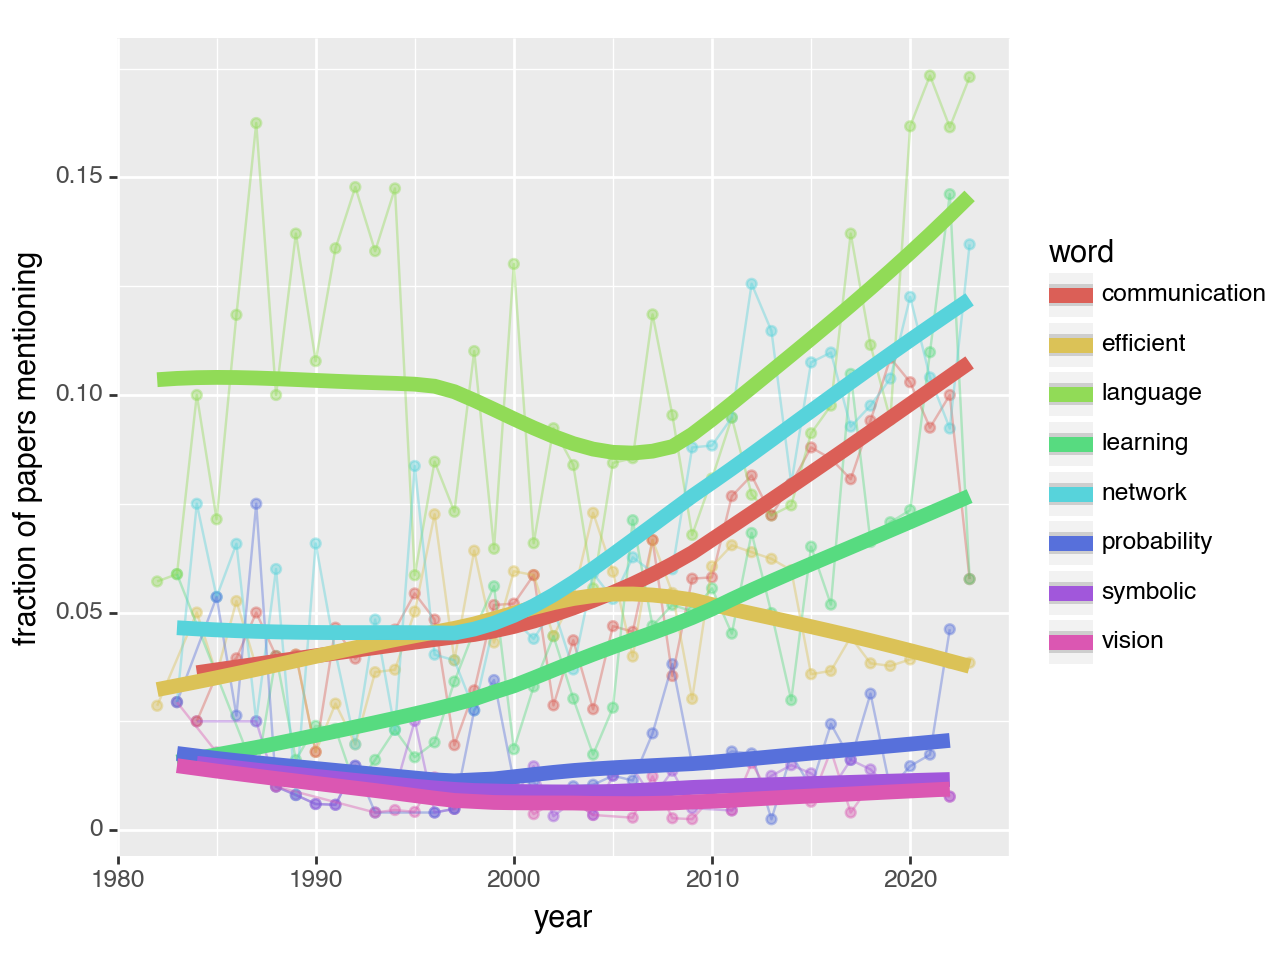

<Figure Size: (640 x 480)>

In [61]:
# write a function that can visualize the changing distribution over referents

dfs = []
for year, counter in sorted(years.items()):
    dfs.append(
        pd.DataFrame(
        [(k,v,year) for k,v in counter.items()],
        columns=["word", "fraction of papers mentioning", "year"]
        )
    )

data = pd.concat(dfs)

# lets just look at a few words for now
# words = [
#     "learning",
#     "hydrodynamic",
#     "simulations",
#     "neutrino",
#     "exoplanet",
#     "dark",
# ]

words = [
    "probability",
    "language",
    "efficient",
    "communication",
    "vision",
    # "deep",
    "learning",
    "network",
    # "evolution",
    "symbolic",
    # "efficiency",
    # "machine",
]

# the results are pretty weird / counterintuitive for philosophy. We may need to implement a restriction to specific fields; though this will further limit our sample size.
# it feels likely that biomedical + computer science + physics + astronomy are the best represented in semantic scholar.
# words = [ 
#     "philosophy",
#     "evidence",
#     "theory",
#     "epistemic",
#     "semantic",
#     # confounds
#     "medical",
#     "prescription",
# ]

data = data[data["word"].isin(words)]
data

(
    pn.ggplot(data, pn.aes(x="year", y="fraction of papers mentioning"))
    + pn.geom_point(
        mapping=pn.aes(
            color="word",
        ),
        alpha=0.4,
    )
    + pn.geom_line(
        mapping=pn.aes(
            color="word",
        ),
        alpha=0.4,
    )
    + pn.geom_smooth(
        mapping=pn.aes(
            color="word",
        ),
        size=3,
    )
)

In [62]:
data

,word,fraction of papers mentioning,year
32,efficient,0.028571,1982
1277,language,0.057143,1982
34,network,0.029412,1983
767,vision,0.029412,1983
794,probability,0.029412,1983
...,...,...,...
164,communication,0.057692,2023
223,network,0.134615,2023
1642,language,0.173077,2023
2131,efficient,0.038462,2023


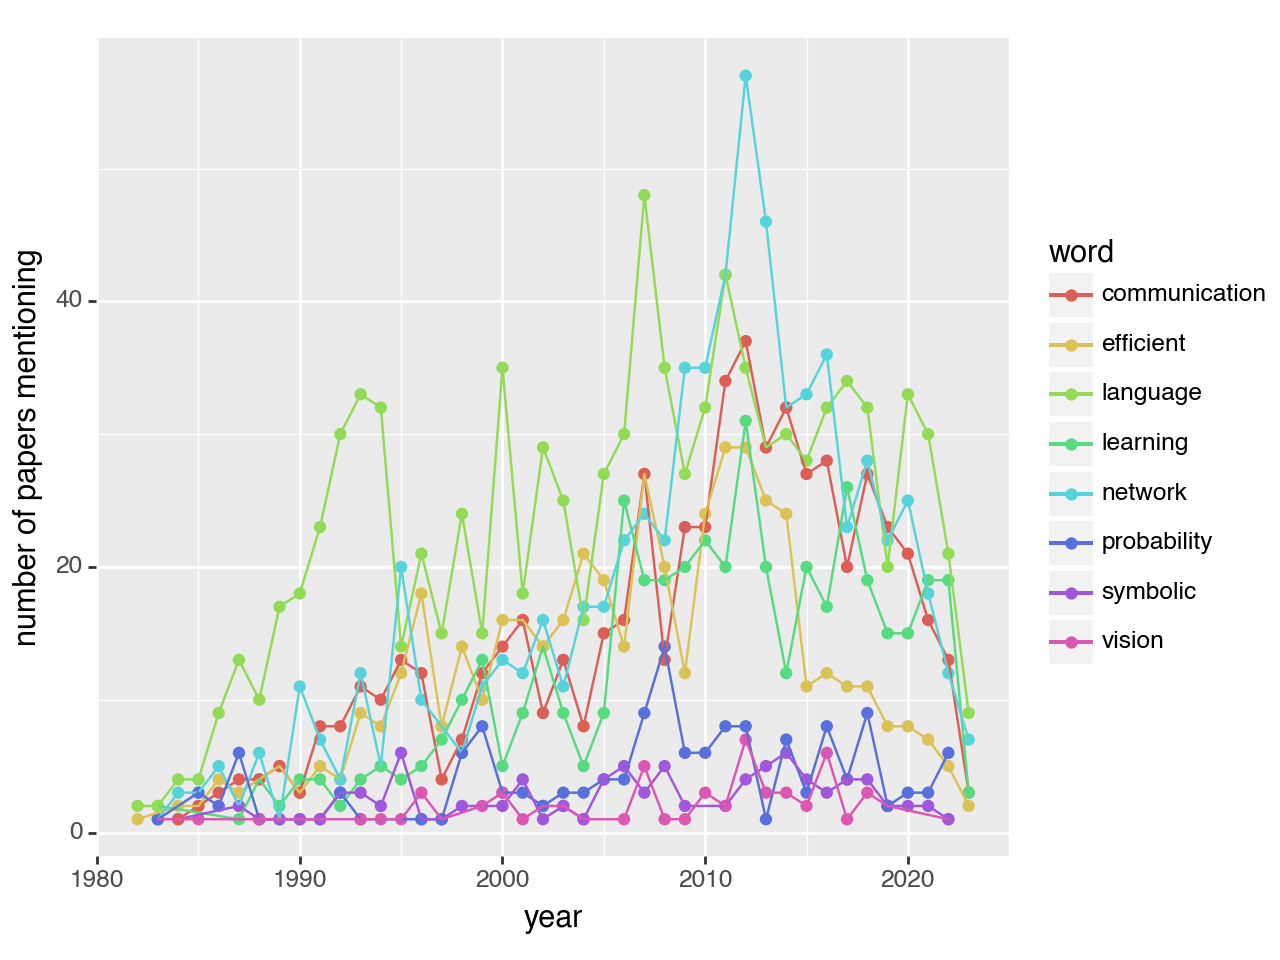

<Figure Size: (640 x 480)>

In [63]:

# lol bc idk how to fix faster
for key in years:
    counter = years[key]
    for word, freq in counter.items():
        counter[word] = freq * papers_per_year[key]

dfs = []
for year, counter in sorted(years.items()):
    dfs.append(
        pd.DataFrame(
        [(k,v,year) for k,v in counter.items()],
        columns=["word", "number of papers mentioning", "year"]
        )
    )

data = pd.concat(dfs)


data = data[data["word"].isin(words)]
data

(
    pn.ggplot(data, pn.aes(x="year", y="number of papers mentioning"))
    # + pn.geom_point(
    #     mapping=pn.aes(
    #         color="word",
    #     )
    # )
    + pn.geom_line(
        mapping=pn.aes(
            color="word",
        )
    )
)

In [64]:
sum([papers_per_year[k] for k in papers_per_year if papers_per_year[k] > 30])

10014

In [65]:
list(years[2010].items())[:10]

[('as', 192.0),
 ('the', 377.0),
 ('contracting', 1.0),
 ("officer's", 1.0),
 ('representative.', 1.0),
 ('The', 224.0),
 ('views', 2.0),
 ('expressed', 9.0),
 ('herein', 1.0),
 ('do', 33.0)]